# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [1]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [3]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Moon.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

존경하고 사랑하는 국민여러분. 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁고, 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.

우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.

함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야합니다.

존경하는 국민 여러분, 지난 몇 달 우리는 유례없는 정치적 격변기를 겪었습니다. 정치는 혼란스러웠지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다. 전화위복의 기회로 승화시켜 새로운 길을 열었습니다. 우리 국민들은 좌절하지 않고 오히려 이를 전화위복의 계기로 승화시켜 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다.

그리고 이번 대통령 선거에서 우리 국민들은 또 다른 역사 만들어주셨습니다. 전국 각지에서 골고른 지지로 새로운 대통령을 만들어주셨습니다. 오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않은 국민 한분 한분도 저의 국민이고, 우리의 섬기겠습니다.

저는 감히 약속드립니다. 2017년 5월10일, 이날은 진정한 국민 통합이 시작되는 날로 역사에 기록될 

In [4]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Kim.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

친애하는 여러분 북과 남, 해외의 동포 형제 자매들. 오늘 저와 문재인 대통령은 분열의 비극과 통일의 열망이 응결되어 있는 이곳 판문점에서 역사적인 책임감과 사명감을 안고 첫 회담을 가지었습니다. 

나는 먼저 수뇌상봉과 회담의 성공적인 개최를 위하여 많은 노고를 바치신 문재인 대통령과 남측 관계자 여러분들께 깊은 사의를 표합니다.

또한 우리들을 위해 온갖 정성과 노력을 다 기울이며 성대히 맞이하여 주고 한 혈육, 한 형제, 한민족의 따뜻한 정을 다해준 남녘 동포들에게 감사의 인사를 드립니다.

북과 남이 오늘 이렇게 다시 두 손을 맞잡기까지 참으로 긴 시간이 흘렀고 우리 모두는 너무 오랫동안 이 만남을 한마음으로 기다려왔습니다.

정작 마주 서고 보니 북과 남은 역시 서로 갈라져 살 수 없는 한 혈육이며 그 어느 이웃에도 비길 수 없는 동족이라는 것을 가슴 뭉클하게 절감하게 되었습니다.

이토록 지척에 살고 있는 우리는 대결하여 싸워야 할 이(異)민족이 아니라 단합하여 화목하게 살아야 할 한 핏줄을 이룬 한민족입니다.

하루빨리 온 겨레가 마음 놓고 평화롭게 잘 살아갈 길을 열고 우리 민족의 새로운 미래를 개척해 나갈 결심을 안고 나는 오늘 판문점 분리선을 넘어 여기에 왔습니다.

저와 문재인 대통령은 우리의 상봉을 간절히 바라고 열렬히 지지 성원 하여준 북과 남 온 겨레의 성원과 기대를 무겁게 받아들이고 북남 인민들이 절실히 바라는 문제 해결을 위해 많은 의제들을 진지하게 논의하였습니다.

무엇보다도 온 겨레가 전쟁 없는 평화로운 땅에서 번영과 행복을 누리는 새 시대를 열어나갈 확고한 의지를 같이하고 이를 위한 실천적 대책들을 합의하였습니다.

그리고 이미 채택된 북남 선언들과 모든 합의들을 철저히 이행해 나가는 것으로 관계 개선과 발전의 전환적 국면을 열어나가기로 하였습니다. 

저와 문재인 대통령은 방금 오늘 회담에서 합의된 의제들과 그 구체적 조치들을 반영한 조선반도의 평화와 번영, 통일을 위한 판문점 선언을 채택하고 서명하였습니다.

우리가 오늘 

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [5]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['존경하고 사랑하는 국민여러분. 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁고, 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.',
 '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.',
 '함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야합니다.',
 '존경하는 국민 여러분, 지난 몇 달 우리는 유례없는 정치적 격변기를 겪었습니다. 정치는 혼란스러웠지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다. 전화위복의 기회로 승화시켜 새로운 길을 열었습니다. 우리 국민들은 좌절하지 않고 오히려 이를 전화위복의 계기로 승화시켜 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다.',
 '그리고 이번 대통령 선거에서 우리 국민들은 또 다른 역사 만들어주셨습니다. 전국 각지에서 골고른 지지로 새로운 대통령을 만들어주셨습니다. 오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않은 국민 한분 한분도 저의 국민이고, 우리의 섬기겠습니다.',
 '저는 감히 약속드립니다. 2017년 5월10일, 이날은 진정한 국민 통합이

In [6]:
# 연설문 2번 전처리
message_of_kim = message_of_kim.split('\n\n')
message_of_kim

['친애하는 여러분 북과 남, 해외의 동포 형제 자매들. 오늘 저와 문재인 대통령은 분열의 비극과 통일의 열망이 응결되어 있는 이곳 판문점에서 역사적인 책임감과 사명감을 안고 첫 회담을 가지었습니다. ',
 '나는 먼저 수뇌상봉과 회담의 성공적인 개최를 위하여 많은 노고를 바치신 문재인 대통령과 남측 관계자 여러분들께 깊은 사의를 표합니다.',
 '또한 우리들을 위해 온갖 정성과 노력을 다 기울이며 성대히 맞이하여 주고 한 혈육, 한 형제, 한민족의 따뜻한 정을 다해준 남녘 동포들에게 감사의 인사를 드립니다.',
 '북과 남이 오늘 이렇게 다시 두 손을 맞잡기까지 참으로 긴 시간이 흘렀고 우리 모두는 너무 오랫동안 이 만남을 한마음으로 기다려왔습니다.',
 '정작 마주 서고 보니 북과 남은 역시 서로 갈라져 살 수 없는 한 혈육이며 그 어느 이웃에도 비길 수 없는 동족이라는 것을 가슴 뭉클하게 절감하게 되었습니다.',
 '이토록 지척에 살고 있는 우리는 대결하여 싸워야 할 이(異)민족이 아니라 단합하여 화목하게 살아야 할 한 핏줄을 이룬 한민족입니다.',
 '하루빨리 온 겨레가 마음 놓고 평화롭게 잘 살아갈 길을 열고 우리 민족의 새로운 미래를 개척해 나갈 결심을 안고 나는 오늘 판문점 분리선을 넘어 여기에 왔습니다.',
 '저와 문재인 대통령은 우리의 상봉을 간절히 바라고 열렬히 지지 성원 하여준 북과 남 온 겨레의 성원과 기대를 무겁게 받아들이고 북남 인민들이 절실히 바라는 문제 해결을 위해 많은 의제들을 진지하게 논의하였습니다.',
 '무엇보다도 온 겨레가 전쟁 없는 평화로운 땅에서 번영과 행복을 누리는 새 시대를 열어나갈 확고한 의지를 같이하고 이를 위한 실천적 대책들을 합의하였습니다.',
 '그리고 이미 채택된 북남 선언들과 모든 합의들을 철저히 이행해 나가는 것으로 관계 개선과 발전의 전환적 국면을 열어나가기로 하였습니다. ',
 '저와 문재인 대통령은 방금 오늘 회담에서 합의된 의제들과 그 구체적 조치들을 반영한 조선반도의 평화와 번영, 통일을 위

In [7]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<29x481 sparse matrix of type '<class 'numpy.int64'>'
	with 600 stored elements in Compressed Sparse Row format>

In [8]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_kim)
tf_bow2 = tf_vectorizer.fit_transform(message_of_kim)
tf_bow2

<24x392 sparse matrix of type '<class 'numpy.int64'>'
	with 481 stored elements in Compressed Sparse Row format>

In [9]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

481
481


['가속화될',
 '가슴',
 '가운데',
 '가지고',
 '가지었습니다',
 '가진',
 '간절한',
 '간절히',
 '갈라져',
 '감사의',
 '감사합니다',
 '같이하고',
 '개선과',
 '개척해',
 '개최를',
 '것으로',
 '것을',
 '것이며',
 '것입니다',
 '겨레가',
 '겨레의',
 '격려를',
 '결과를',
 '결실을',
 '결실이',
 '결심을',
 '계시는',
 '고통이',
 '관계',
 '관계자',
 '관심과',
 '구체적',
 '국면을',
 '굳은',
 '그리고',
 '그의',
 '기다려왔습니다',
 '기다리는',
 '기대를',
 '기대에',
 '기록되지',
 '기쁨을',
 '기울이며',
 '기자',
 '기초하여',
 '긴밀히',
 '길로',
 '길에는',
 '길을',
 '깊은',
 '꿈과',
 '끝까지',
 '끝없는',
 '나가는',
 '나가면',
 '나가야',
 '나간다면',
 '나갈',
 '나는',
 '나아갑시다',
 '날들을',
 '남녘',
 '남은',
 '남의',
 '남이',
 '남측',
 '내가',
 '너무',
 '넘어',
 '노고를',
 '노력과',
 '노력을',
 '노력해',
 '논의하였습니다',
 '놓고',
 '놓아야',
 '놓음으로써',
 '누리게',
 '누리는',
 '다녀간',
 '다시',
 '다해',
 '다해준',
 '단합과',
 '단합하여',
 '닫겨',
 '대결하여',
 '대의를',
 '대책들을',
 '대통령과',
 '대통령은',
 '더욱',
 '도전을',
 '동족이라는',
 '동포',
 '동포들에게',
 '되고',
 '되기를',
 '되어',
 '되었습니다',
 '되풀이되지',
 '된다면',
 '됩니다',
 '드립니다',
 '따뜻한',
 '땅에서',
 '또한',
 '뜨거운',
 '뜻과',
 '마련되었던',
 '마음',
 '마음으로',
 '마주',
 '마주하고',
 '만남과',
 '만남에',
 '만남을',
 '많은',
 '맞이하여',
 '맞잡기까지',
 '맞추며',
 '맺어지도록',
 '맺을',
 '먼

In [10]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

392
392


['가속화될',
 '가슴',
 '가운데',
 '가지고',
 '가지었습니다',
 '가진',
 '간절한',
 '간절히',
 '갈라져',
 '감사의',
 '감사합니다',
 '같이하고',
 '개선과',
 '개척해',
 '개최를',
 '것으로',
 '것을',
 '것이며',
 '것입니다',
 '겨레가',
 '겨레의',
 '격려를',
 '결과를',
 '결실을',
 '결실이',
 '결심을',
 '계시는',
 '고통이',
 '관계',
 '관계자',
 '관심과',
 '구체적',
 '국면을',
 '굳은',
 '그리고',
 '그의',
 '기다려왔습니다',
 '기다리는',
 '기대를',
 '기대에',
 '기록되지',
 '기쁨을',
 '기울이며',
 '기자',
 '기초하여',
 '긴밀히',
 '길로',
 '길에는',
 '길을',
 '깊은',
 '꿈과',
 '끝까지',
 '끝없는',
 '나가는',
 '나가면',
 '나가야',
 '나간다면',
 '나갈',
 '나는',
 '나아갑시다',
 '날들을',
 '남녘',
 '남은',
 '남의',
 '남이',
 '남측',
 '내가',
 '너무',
 '넘어',
 '노고를',
 '노력과',
 '노력을',
 '노력해',
 '논의하였습니다',
 '놓고',
 '놓아야',
 '놓음으로써',
 '누리게',
 '누리는',
 '다녀간',
 '다시',
 '다해',
 '다해준',
 '단합과',
 '단합하여',
 '닫겨',
 '대결하여',
 '대의를',
 '대책들을',
 '대통령과',
 '대통령은',
 '더욱',
 '도전을',
 '동족이라는',
 '동포',
 '동포들에게',
 '되고',
 '되기를',
 '되어',
 '되었습니다',
 '되풀이되지',
 '된다면',
 '됩니다',
 '드립니다',
 '따뜻한',
 '땅에서',
 '또한',
 '뜨거운',
 '뜻과',
 '마련되었던',
 '마음',
 '마음으로',
 '마주',
 '마주하고',
 '만남과',
 '만남에',
 '만남을',
 '많은',
 '맞이하여',
 '맞잡기까지',
 '맞추며',
 '맺어지도록',
 '맺을',
 '먼

In [11]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['19대', '2017년', '5월10일', '가겠습니다', '가고', '가까운', '가능할', '가득', '가슴은', '가장', '각지에서', '갈등은', '갈등을', '갈등의', '감내하며', '감사드립니다', '감사의', '감사합니다', '감히', '강력한', '강화를', '강화하겠습니다', '거듭', '거짓으로', '것임을', '것입니다', '격변기를', '격의없는', '겪었습니다', '견제장치를', '결과는', '결별하겠습니다', '겸손한', '겸허한', '경쟁의', '경제가', '경험하지', '계기로', '계속되고', '계층과', '고르게', '고향으로', '곧바로', '골고른', '곳에', '공정한', '공정할', '공존의', '과감히', '과정에서', '과정은', '관행과', '광화문', '광화문광장에서', '광화문시대', '구속', '구시대의', '국민', '국민과', '국민들은', '국민들의', '국민들이', '국민여러분', '국민은', '국민의', '국민이', '국민이고', '국방력에서', '국정운영의', '군림하고', '권력기관도', '권력기관은', '권력을', '권력이', '권력행사를', '권위적', '그래서', '그런', '그리고', '그토록', '기록될', '기회는', '기회로', '긴장완화의', '길에', '길을', '깊이', '깨끗한', '꼼꼼하게', '끝나야', '나누겠습니다', '나눌', '나라', '나라냐고', '나라답게', '나라를', '나라입니다', '나서서', '나와', '날로', '날아가겠습니다', '남겠습니다', '낮은', '낱말이', '내딛습니다', '노력하겠습니다', '노심초사하는', '눈높이를', '눈물을', '능력과', '다른', '다시', '다하겠습니다', '다할', '닦아드리는', '대로', '대역사가', '대원칙으로', '대토론회를', '대통령', '대통령부터', '대통령선거는', '대통령으로', '대통령으로서', '대통령으로서의', '대통령을', '대통령의', '대통령이', '대한', '대한민국', 

array([ 1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1, 11,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  1,  1,  1,  2,  1,  1,  1,  2,  4,  2,  1,  1,  1,  1,  2,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        5,  2,  1,  1,  1,  1,  1,  5, 17,  1,  3,  1,  3,  2,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1, 13,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  2,  1,  5,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,
        1,  1,  1,  2,  1

In [12]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['가속화될', '가슴', '가운데', '가지고', '가지었습니다', '가진', '간절한', '간절히', '갈라져', '감사의', '감사합니다', '같이하고', '개선과', '개척해', '개최를', '것으로', '것을', '것이며', '것입니다', '겨레가', '겨레의', '격려를', '결과를', '결실을', '결실이', '결심을', '계시는', '고통이', '관계', '관계자', '관심과', '구체적', '국면을', '굳은', '그리고', '그의', '기다려왔습니다', '기다리는', '기대를', '기대에', '기록되지', '기쁨을', '기울이며', '기자', '기초하여', '긴밀히', '길로', '길에는', '길을', '깊은', '꿈과', '끝까지', '끝없는', '나가는', '나가면', '나가야', '나간다면', '나갈', '나는', '나아갑시다', '날들을', '남녘', '남은', '남의', '남이', '남측', '내가', '너무', '넘어', '노고를', '노력과', '노력을', '노력해', '논의하였습니다', '놓고', '놓아야', '놓음으로써', '누리게', '누리는', '다녀간', '다시', '다해', '다해준', '단합과', '단합하여', '닫겨', '대결하여', '대의를', '대책들을', '대통령과', '대통령은', '더욱', '도전을', '동족이라는', '동포', '동포들에게', '되고', '되기를', '되어', '되었습니다', '되풀이되지', '된다면', '됩니다', '드립니다', '따뜻한', '땅에서', '또한', '뜨거운', '뜻과', '마련되었던', '마음', '마음으로', '마주', '마주하고', '만남과', '만남에', '만남을', '많은', '맞이하여', '맞잡기까지', '맞추며', '맺어지도록', '맺을', '먼저', '모두', '모두는', '모든', '모아', '무겁게', '무릎을', '무엇보다도', '문도', '문재인', '문제', '문화를', '뭉클하게', '미래로', '미래를', '민족만대의', '민족의', '민족이', 

array([ 1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        1,  5,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  2,  1,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  2,  1,  1,  5,  1,  1,  1,  1,  1,  4,  1,  1,  1,
        1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  1, 10,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  4

In [13]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'19대': 1,
 '2017년': 2,
 '5월10일': 2,
 '가겠습니다': 1,
 '가고': 1,
 '가까운': 1,
 '가능할': 1,
 '가득': 1,
 '가슴은': 1,
 '가장': 1,
 '각지에서': 1,
 '갈등은': 1,
 '갈등을': 1,
 '갈등의': 1,
 '감내하며': 1,
 '감사드립니다': 1,
 '감사의': 1,
 '감사합니다': 2,
 '감히': 1,
 '강력한': 1,
 '강화를': 1,
 '강화하겠습니다': 1,
 '거듭': 1,
 '거짓으로': 1,
 '것임을': 1,
 '것입니다': 6,
 '격변기를': 1,
 '격의없는': 1,
 '겪었습니다': 1,
 '견제장치를': 1,
 '결과는': 1,
 '결별하겠습니다': 1,
 '겸손한': 1,
 '겸허한': 1,
 '경쟁의': 1,
 '경제가': 1,
 '경험하지': 1,
 '계기로': 2,
 '계속되고': 1,
 '계층과': 1,
 '고르게': 1,
 '고향으로': 1,
 '곧바로': 1,
 '골고른': 1,
 '곳에': 1,
 '공정한': 1,
 '공정할': 1,
 '공존의': 1,
 '과감히': 1,
 '과정에서': 2,
 '과정은': 1,
 '관행과': 1,
 '광화문': 1,
 '광화문광장에서': 1,
 '광화문시대': 1,
 '구속': 1,
 '구시대의': 1,
 '국민': 11,
 '국민과': 4,
 '국민들은': 3,
 '국민들의': 1,
 '국민들이': 1,
 '국민여러분': 1,
 '국민은': 1,
 '국민의': 1,
 '국민이': 1,
 '국민이고': 1,
 '국방력에서': 1,
 '국정운영의': 1,
 '군림하고': 1,
 '권력기관도': 1,
 '권력기관은': 1,
 '권력을': 1,
 '권력이': 1,
 '권력행사를': 1,
 '권위적': 1,
 '그래서': 1,
 '그런': 1,
 '그리고': 1,
 '그토록': 1,
 '기록될': 1,
 '기회는': 1,
 '기회로': 1,
 '긴장완화의': 1,
 '길에': 1,
 '길을': 2,
 '깊이'

In [14]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'가속화될': 1,
 '가슴': 2,
 '가운데': 1,
 '가지고': 1,
 '가지었습니다': 1,
 '가진': 1,
 '간절한': 1,
 '간절히': 1,
 '갈라져': 1,
 '감사의': 1,
 '감사합니다': 1,
 '같이하고': 1,
 '개선과': 1,
 '개척해': 1,
 '개최를': 1,
 '것으로': 1,
 '것을': 3,
 '것이며': 1,
 '것입니다': 5,
 '겨레가': 2,
 '겨레의': 1,
 '격려를': 1,
 '결과를': 1,
 '결실을': 1,
 '결실이': 1,
 '결심을': 1,
 '계시는': 1,
 '고통이': 1,
 '관계': 1,
 '관계자': 1,
 '관심과': 1,
 '구체적': 1,
 '국면을': 1,
 '굳은': 1,
 '그리고': 3,
 '그의': 1,
 '기다려왔습니다': 1,
 '기다리는': 1,
 '기대를': 2,
 '기대에': 1,
 '기록되지': 1,
 '기쁨을': 1,
 '기울이며': 1,
 '기자': 1,
 '기초하여': 1,
 '긴밀히': 1,
 '길로': 1,
 '길에는': 1,
 '길을': 1,
 '깊은': 1,
 '꿈과': 1,
 '끝까지': 1,
 '끝없는': 1,
 '나가는': 1,
 '나가면': 1,
 '나가야': 1,
 '나간다면': 1,
 '나갈': 2,
 '나는': 2,
 '나아갑시다': 1,
 '날들을': 1,
 '남녘': 1,
 '남은': 2,
 '남의': 1,
 '남이': 3,
 '남측': 1,
 '내가': 1,
 '너무': 1,
 '넘어': 1,
 '노고를': 1,
 '노력과': 1,
 '노력을': 1,
 '노력해': 1,
 '논의하였습니다': 1,
 '놓고': 1,
 '놓아야': 1,
 '놓음으로써': 1,
 '누리게': 1,
 '누리는': 1,
 '다녀간': 1,
 '다시': 2,
 '다해': 1,
 '다해준': 1,
 '단합과': 1,
 '단합하여': 1,
 '닫겨': 1,
 '대결하여': 1,
 '대의를': 1,
 '대책들을': 1,
 '대통령과': 1,
 '대통령은

### 시각화

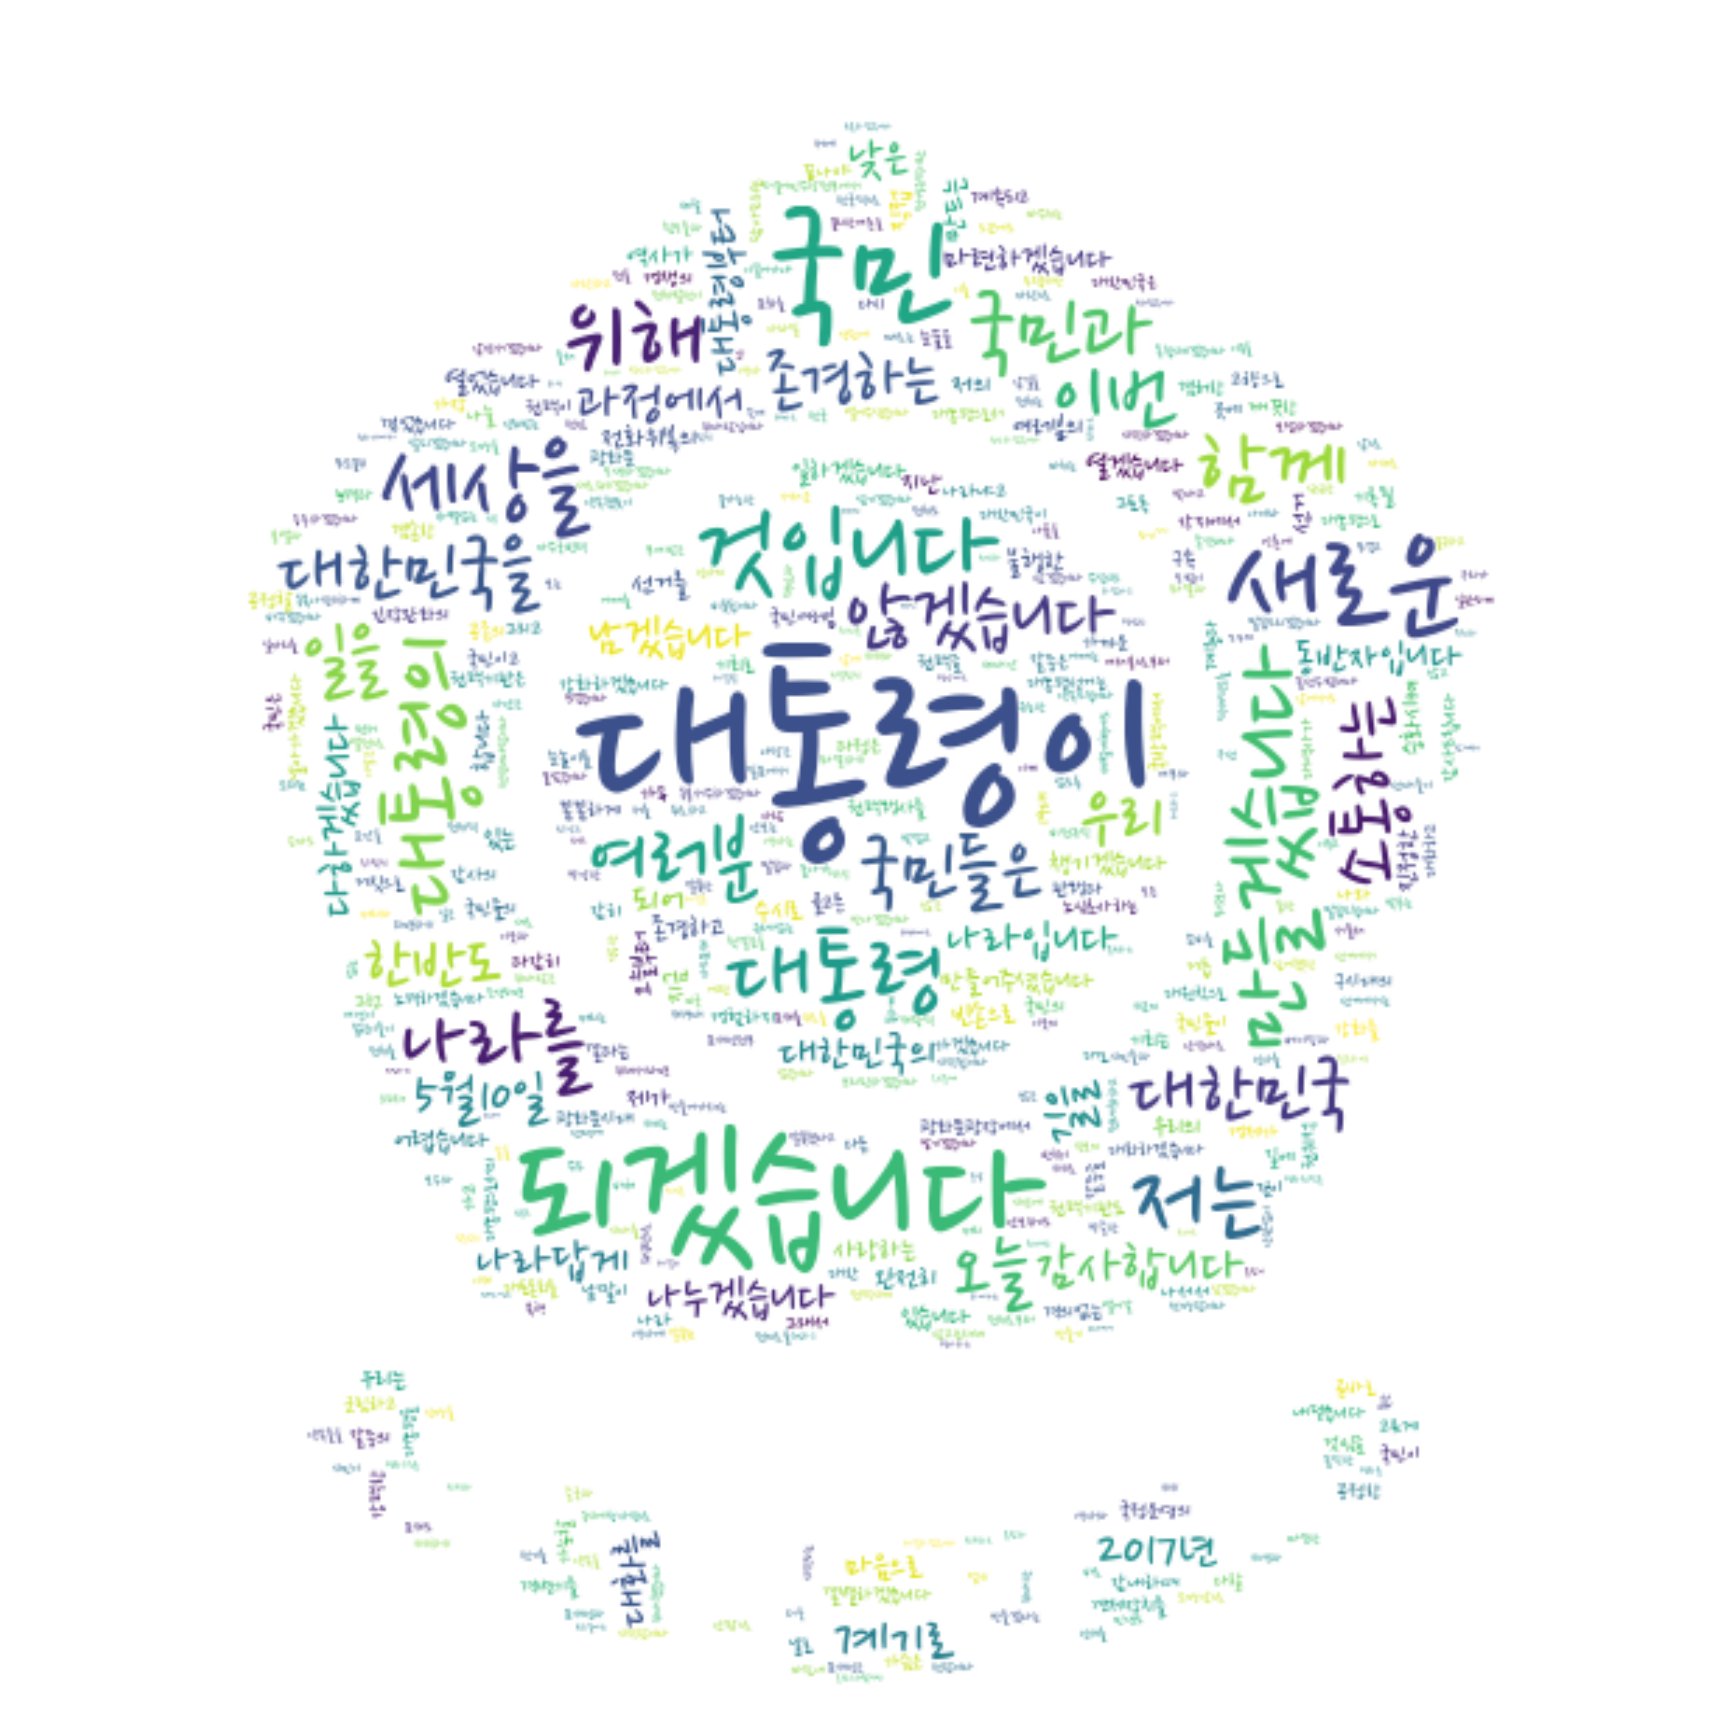

In [15]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기

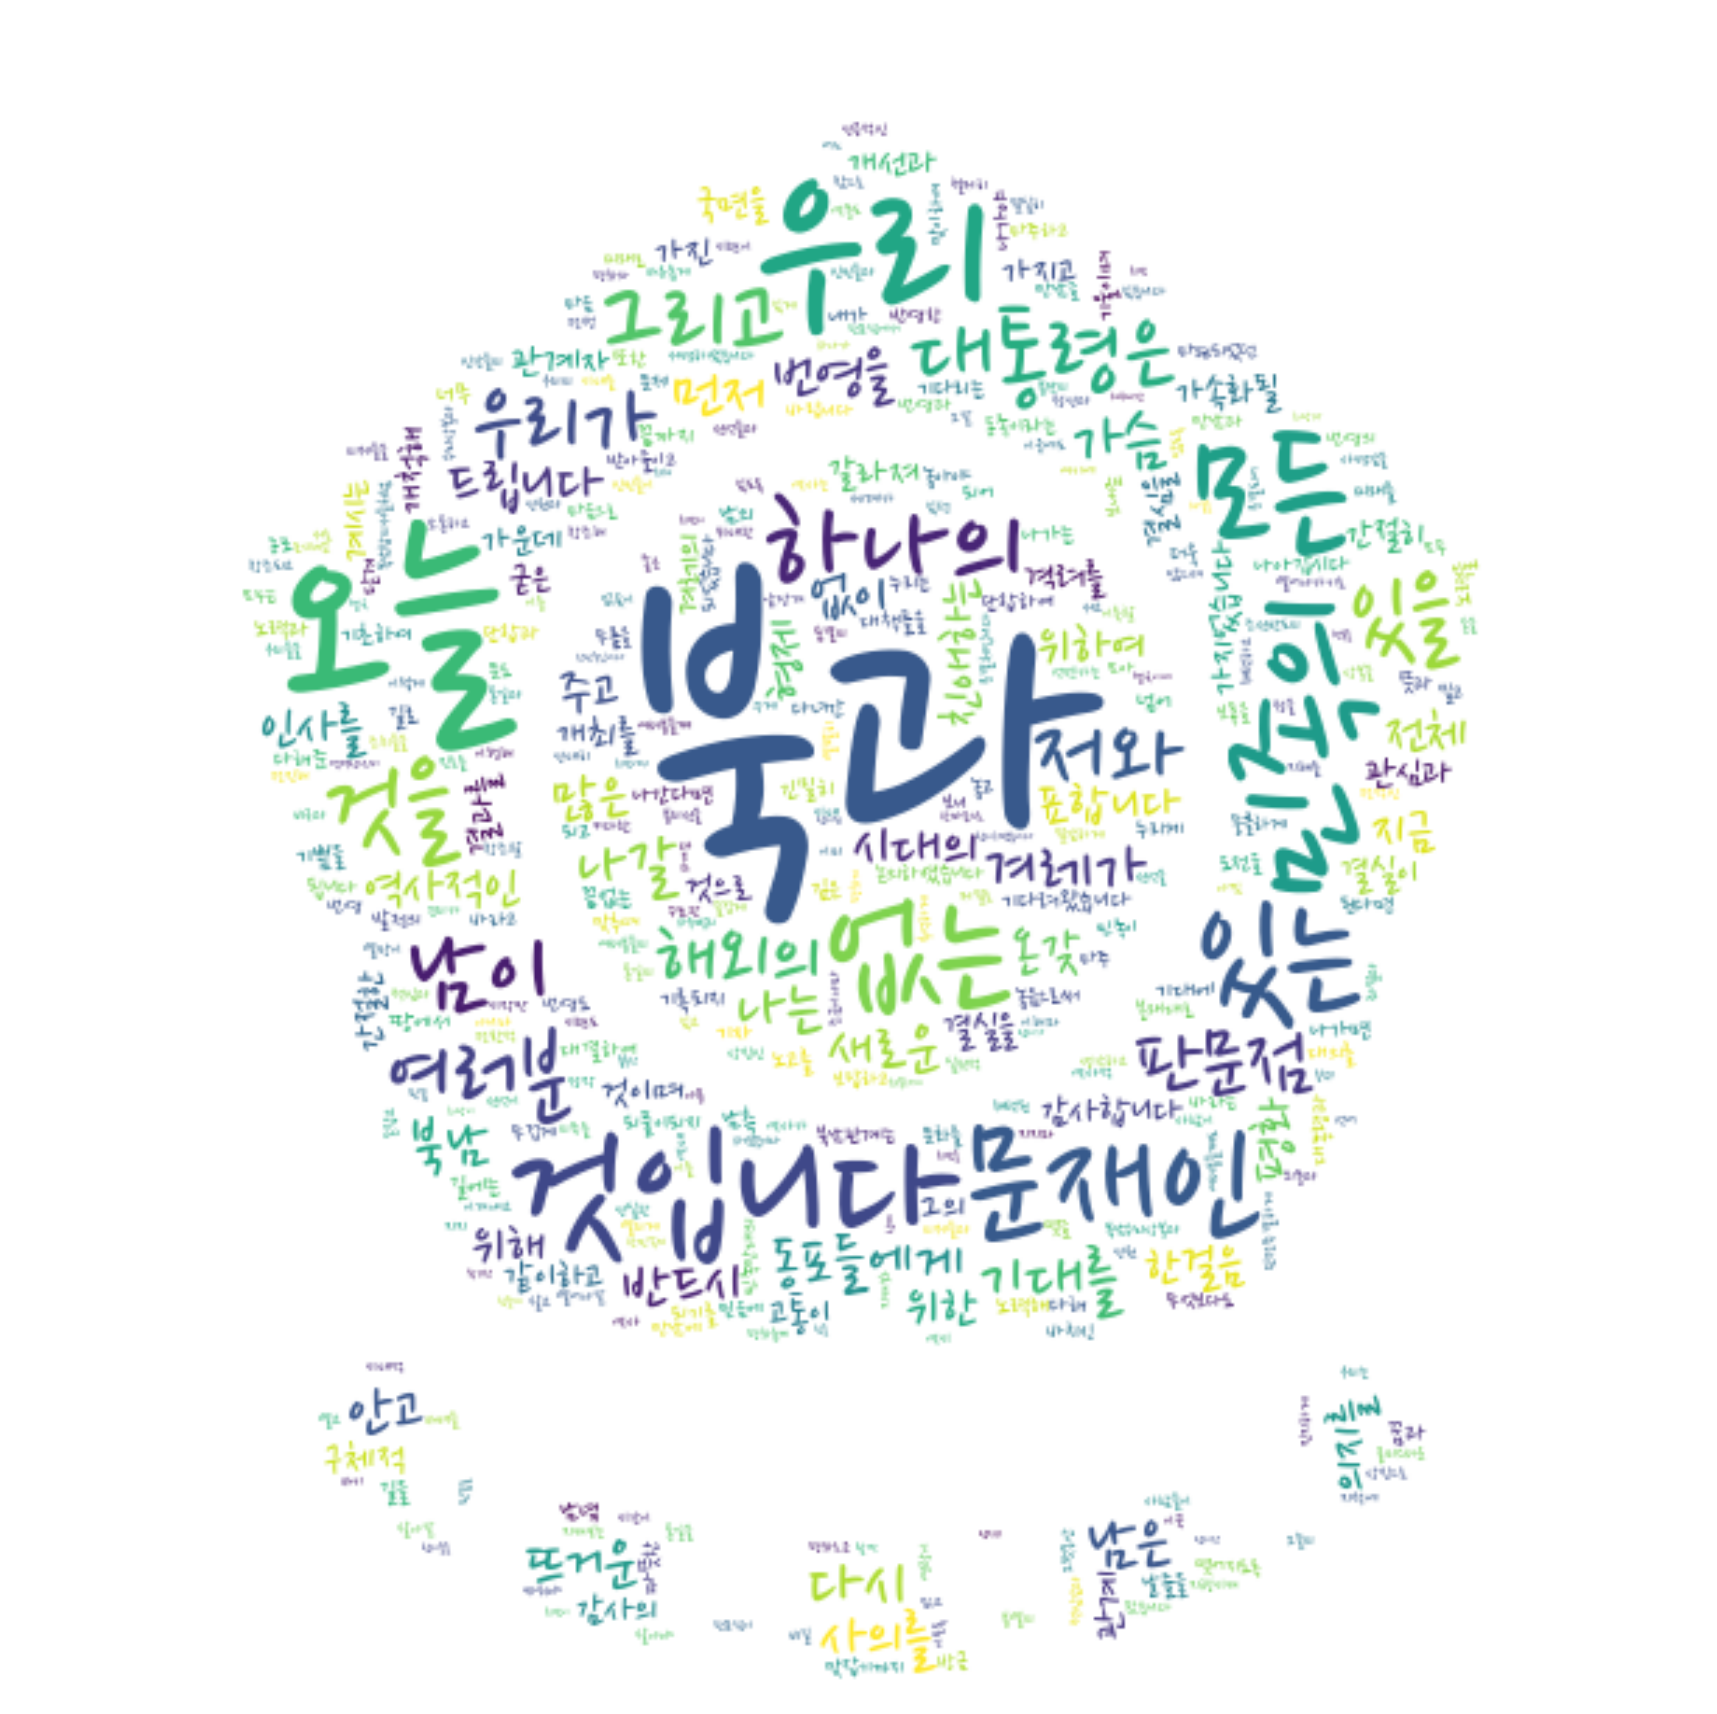

In [16]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기